In [1]:
import numpy as np
import pandas as pd

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# modelling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler


In [2]:
import seaborn as sns
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

plt.style.use('ggplot')
%matplotlib inline
np.set_printoptions(suppress=True) # Suppress scientific notation where possible

In [3]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [4]:
funds_df = pd.read_csv(r'C:\Users\krystynametcalf\Desktop\funds_df.csv')

In [5]:
funds_df = funds_df.drop(columns=['company_name', 'Round_A', 'raised_C'])

In [6]:
funds_df.columns

Index(['funded_year_A', 'raised_A', 'Round_B', 'funded_year_B', 'raised_B',
       'Round_C', 'CHN', 'DEU', 'GBR', 'Other_Country', 'USA', 'Biotechnology',
       'E-Commerce', 'Enterprise Software', 'Mobile', 'Other_Industry',
       'Software', 'Beijing', 'London', 'New York', 'Other_City',
       'San Francisco', 'seed', 'undisclosed', 'venture', 'None', 'venture.1',
       'None.1', 'private_equity', 'venture.2'],
      dtype='object')

In [7]:
# Create a list of feature names
feat_labels = ['funded_year_A', 'raised_A', 'Round_B', 'funded_year_B', 'raised_B',
               'CHN', 'DEU', 'GBR', 'Other_Country', 'USA', 'Biotechnology',
               'E-Commerce', 'Enterprise Software', 'Mobile', 'Other_Industry',
               'Software', 'Beijing', 'London', 'New York', 'Other_City',
               'San Francisco', 'seed', 'undisclosed', 'venture', 'None', 'venture.1',
               'None.1', 'private_equity', 'venture.2']

# Create X from the features
X = funds_df.drop('Round_C', axis=1)

# Create y from output
y = funds_df['Round_C']

In [8]:
# Split the data into 40% test and 60% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [9]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

('funded_year_A', 0.012401151199412198)
('raised_A', 0.0031979602291777546)
('Round_B', 0.026770209178157332)
('funded_year_B', 0.0612481167724511)
('raised_B', 0.022382070332665344)
('CHN', 0.0002535344779807978)
('DEU', 9.274023802052936e-05)
('GBR', 0.0001489235415538441)
('Other_Country', 0.0010785539113943338)
('USA', 0.0014488788508195585)
('Biotechnology', 0.00042057533217096957)
('E-Commerce', 0.00018383542268607053)
('Enterprise Software', 0.0003283137803506578)
('Mobile', 0.00016311321516784344)
('Other_Industry', 0.00039324456033314507)
('Software', 0.00029661385522517154)
('Beijing', 0.000204772376266961)
('London', 6.795815677208497e-05)
('New York', 0.00010502434180964281)
('Other_City', 0.00035121492370958465)
('San Francisco', 0.0004215491878029604)
('seed', 3.171351031162921e-06)
('undisclosed', 1.592277197065417e-08)
('venture', 3.1307336236762796e-06)
('None', 0.026906506395198558)
('venture.1', 0.027121886467831282)
('None.1', 0.4227887737891926)
('private_equity', 

In [21]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.02
sfm = SelectFromModel(clf, threshold=0.02)

# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=10000, n_jobs=-1,
                                                 oob_score=False,

In [22]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

Round_B
funded_year_B
raised_B
None
venture.1
None.1
venture.2


In [25]:
funds_df.columns

Index(['funded_year_A', 'raised_A', 'Round_B', 'funded_year_B', 'raised_B',
       'Round_C', 'CHN', 'DEU', 'GBR', 'Other_Country', 'USA', 'Biotechnology',
       'E-Commerce', 'Enterprise Software', 'Mobile', 'Other_Industry',
       'Software', 'Beijing', 'London', 'New York', 'Other_City',
       'San Francisco', 'seed', 'undisclosed', 'venture', 'None', 'venture.1',
       'None.1', 'private_equity', 'venture.2'],
      dtype='object')

In [34]:
feats_df = funds_df.drop(columns=['funded_year_A', 'raised_A', 'funded_year_B', 'raised_B', 
                                  'CHN', 'DEU', 'GBR', 'Other_Country', 'USA', 'Biotechnology',
                                  'E-Commerce', 'Enterprise Software', 'Mobile', 'Other_Industry', 
                                  'Software', 'Beijing', 'London', 'New York', 'Other_City', 'San Francisco', 'seed', 'undisclosed', 'venture'])

In [35]:
feats_df.head(3)

,Round_B,Round_C,None,venture.1,None.1,private_equity,venture.2
0,0,0,1,0,1,0,0
1,0,0,1,0,1,0,0
2,1,0,0,1,1,0,0


In [36]:
X = feats_df.drop('Round_C', axis=1)
y = feats_df['Round_C']

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X, y)
y_pred = knn.predict(X)


print(metrics.accuracy_score(y, y_pred))

1.0


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [40]:
# Train on training set, and Test on testing set
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9997837837837837


In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[0.9991357 1.        1.        1.        1.        1.        1.
 1.        1.        1.       ]


In [43]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[1.0, 0.9999135695764909, 0.9999135695764909, 0.9999135695764909, 0.9999135695764909, 0.9999135695764909, 0.9999135695764909, 0.9999135695764909, 0.9999135695764909, 0.9999135695764909, 0.9999135695764909, 0.9999135695764909, 0.9999135695764909, 0.9999135695764909, 0.9999135695764909, 0.9999135695764909, 0.9999135695764909, 0.9999135695764909, 0.9999135695764909, 0.9999135695764909, 0.9999135695764909, 0.9999135695764909, 0.9999135695764909, 0.9999135695764909, 0.9999135695764909, 0.9999135695764909, 0.9999135695764909, 0.9999135695764909, 0.9999135695764909, 0.9999135695764909]


Text(0, 0.5, 'Cross-Validated Accuracy')

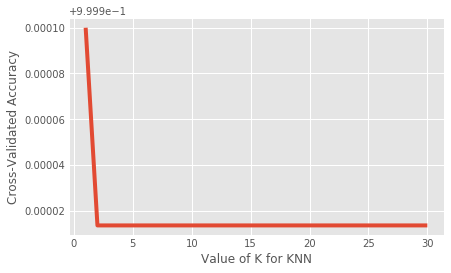

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')